In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.Read in the data from data/cars.csv and call it "df". This is a slightly smaller, cleaned dataset from this original dataset:

https://archive.ics.uci.edu/ml/datasets/automobile

In [2]:
#insert 1
df = pd.read_csv('data/cars.csv', index_col=0)
df

,make,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,volvo,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,volvo,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,volvo,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


2.Create a frequency chart for "make" in descending order of frequency. Hint: use value_counts.

In [3]:
#insert 2
df.make.value_counts()

toyota           32
nissan           18
honda            13
mitsubishi       13
mazda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

3.Drop the "make" column from the dataframe, replacing it with one-hot columns corresponding to each make. This updated dataframe should be called "new_df" and it should contain 35 columns.

In [4]:
#insert 3
one_hot = pd.get_dummies(df['make'])
new_df = df.drop('make', axis = 1)
new_df = new_df.join(one_hot)
new_df.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,...,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,0,0,0,0,0,0,0,0,0


4.Let's do something wrong and see what happens. Let X correspond to all of the input data in new_df (including price) and let y correspond to the target variable (price). Run a linear regression on the entire dataset and print both R^2 and the adjusted R^2. Why do you get what you get?

In [5]:
#insert 4
X = new_df
y = new_df.price
model = LinearRegression()
model.fit(X, y)
print('R-squared', model.score(X,y))
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R-squared 1.0
Adjusted R^2: 1.0


5.In the cell below, correct your mistake above in order and run a linear regression again. Print both R^2 and the adjusted R^2.

In [6]:
#insert 5
X = new_df.drop('price', axis = 1)
y = df.price
model = LinearRegression()
model.fit(X, y)
print('R-squared', model.score(X,y))
print(f"Adjusted R^2: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R-squared 0.9437780881065051
Adjusted R^2: 0.9318309318291375


6.Sort the correlations of each variable with respect to price in decending order to view which variables are most and least influential. Are there any surprises?

In [7]:
#insert 6
new_df.corr()['price'].sort_values()

highway-mpg         -0.715590
city-mpg            -0.702685
toyota              -0.185389
honda               -0.168403
subaru              -0.149992
dodge               -0.147071
mitsubishi          -0.133312
plymouth            -0.126900
chevrolet           -0.112639
nissan              -0.112402
mazda               -0.110537
peak-rpm            -0.104333
volkswagen          -0.101036
isuzu               -0.054873
mercury              0.029082
alfa-romero          0.035005
saab                 0.043799
peugot               0.068190
compression-ratio    0.069500
stroke               0.093746
audi                 0.102243
height               0.138291
volvo                0.146514
porsche              0.326910
bmw                  0.331289
jaguar               0.332145
mercedes-benz        0.525064
bore                 0.546873
wheel-base           0.585793
length               0.695331
width                0.754273
horsepower           0.811027
curb-weight          0.835729
engine-siz

7.Read the "Filter Method" section of the article located here:
    
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
    
Use it to create a list of columns called "relevant_features" that contains only the variables whose correlations with price had an absolute value greater than 0.1. 

In [8]:
#insert 7
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values()

bore           0.546873
wheel-base     0.585793
length         0.695331
city-mpg       0.702685
highway-mpg    0.715590
width          0.754273
horsepower     0.811027
curb-weight    0.835729
engine-size    0.888942
price          1.000000
Name: price, dtype: float64

8.Run a linear regression again but now only with input corresponding to the relevant features. 

Hint: "X = new_df[relevant_features.index]" is a line that may be helpful.

How does your adjusted R^2 here compare to the adjusted R^2 obtained you obtained above by using all columns except for price as your input?

In [9]:
#insert 8
X = new_df[relevant_features.index].drop('price', axis = 1)
y = new_df.price
model = LinearRegression()
model.fit(X, y)
print('R-squared', model.score(X,y))
print(f"Adjusted R^2: {1 - (1-model.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R-squared 0.8292978078465285
Adjusted R^2: 0.8209933768769002


9.For the sake of simplicity, reduce our dataset even further to contain only columns whose correlations with price are greater than 0.7 and print the head of the dataset:

In [10]:
#insert 9
relevant_features = cor_target[cor_target>0.7]
relevant_features.sort_values()

city-mpg       0.702685
highway-mpg    0.715590
width          0.754273
horsepower     0.811027
curb-weight    0.835729
engine-size    0.888942
price          1.000000
Name: price, dtype: float64

10.Run a linear regression model using this reduced input:

In [11]:
#insert 10
X = new_df[relevant_features.index].drop('price', axis = 1)
y = new_df.price
model1 = LinearRegression()
model1.fit(X, y)
print('R-squared', model1.score(X,y))
print(f"Adjusted R^2: {1 - (1-model1.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")

R-squared 0.8280070807095942
Adjusted R^2: 0.8225179449875599


11.Write the equation of the linear regression model. You can do this in markdown or using hashtags.

In [12]:
#insert 11
# print out intercept
print(model1.intercept_)
# print out other coefficients
print(model1.coef_)
print(X.head)

-54600.13476509777
[626.26930849   2.40772293  94.93655879  50.4563703  -98.82243303
 180.7692751 ]
<bound method NDFrame.head of      width  curb-weight  engine-size  horsepower  city-mpg  highway-mpg
0     64.1         2548          130       111.0        21           27
1     64.1         2548          130       111.0        21           27
2     65.5         2823          152       154.0        19           26
3     66.2         2337          109       102.0        24           30
4     66.4         2824          136       115.0        18           22
..     ...          ...          ...         ...       ...          ...
200   68.9         2952          141       114.0        23           28
201   68.8         3049          141       160.0        19           25
202   68.9         3012          173       134.0        18           23
203   68.9         3217          145       106.0        26           27
204   68.9         3062          141       114.0        19           25

[195 

$\hat{y} = -54600.135 + 626.269x_1 + 2.408 x_2 + 50.456 x_3 - 98.822 x_4 + 180.769 x_5$

12.The stats on a school bus are width = 102 inches, curb-weight = 30000 pounds, engine-size = 550, horsepower = 250, city-mpg = 4, highway-mpg = 6. Use model.predict to predict the price of the school bus. Why might you have reservations in using this model to do this?

In [13]:
#insert 12
print(model1.predict([[102, 30000, 550, 250, 4, 6]]))

[147029.54851134]


13.Do a sns pair-wise plot of the 6 predictor variables and price.

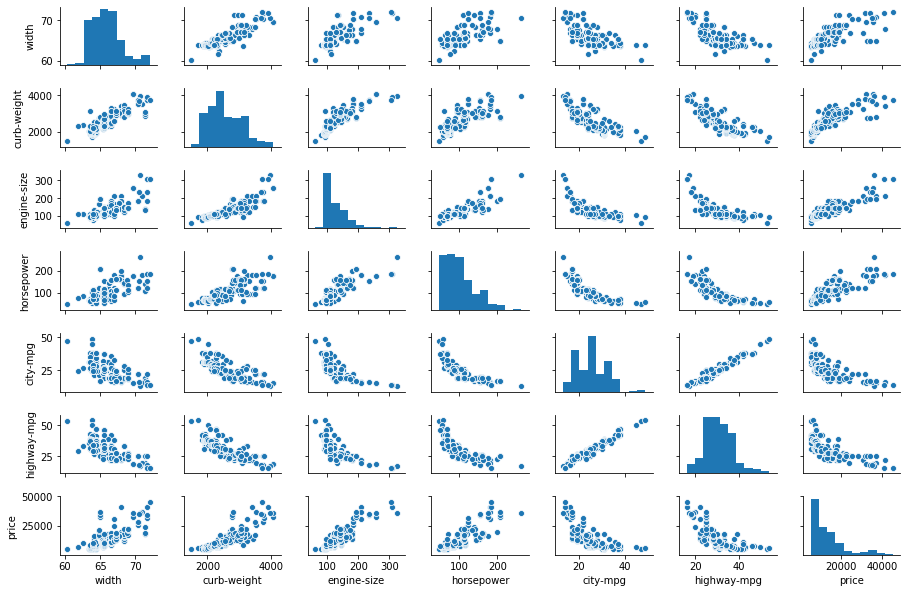

In [14]:
#insert 13
sns.pairplot(new_df[relevant_features.index], height = 1.2, aspect=1.5)

14.We have been sweeping something under the rug...the histograms should appear somewhat normally distributed if we want to use linear regression. The price, engine-size, and horse-power histograms look especially skewed. Create a new dataframe that contains **seven** variables: the original width, curb-weight, city-mpg, and highway-mpg, and the logs of the price, engine-size, and horsepower columns.

Hint: X['log_price'] = np.log(X['price']) is a quick way to make a new column.

In [15]:
#insert 14
new_df.head()
X1 = new_df.loc[:, relevant_features.index]
X1['log_price'] = np.log(X1['price'])
X1['log_engine-size'] = np.log(X1['engine-size'])
X1['log_horsepower'] = np.log(X1['horsepower'])
X1 = X1.drop(columns = ['price','engine-size','horsepower'])

15.Create a new sns-pairplot of this data to verify that the histograms look a bit more normally distributed:

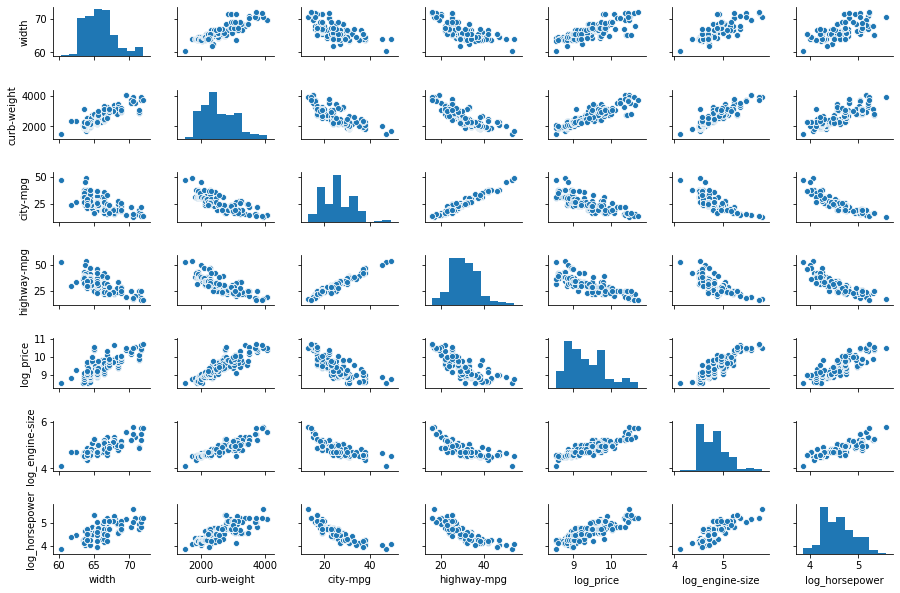

In [16]:
#insert 15
sns.pairplot(X1, height = 1.2, aspect=1.5)

16.Run a linear regression on this transformed dataset, using log_price as your target variable, Did your R^2 improve by transforming the data?

In [17]:
#insert 16
y = X1.log_price
X1 = X1.drop('log_price', axis = 1)

model = LinearRegression()
model.fit(X1, y)
print('R-squared', model.score(X1,y))
print(f"Adjusted R^2: {1 - (1-model.score(X1, y))*(len(y)-1)/(len(y)-X1.shape[1]-1)}")

R-squared 0.8680533708699258
Adjusted R^2: 0.863842308238115
